## Part -1

### importing modules

In [1]:
import pandas as pd
import random
import numpy as  np
import math
from copy import deepcopy
import matplotlib.pyplot as plt
import operator
from copy import deepcopy
from collections import Counter
from keras.layers import Input, Dense
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


### dropping output column

In [2]:
original_data = pd.read_csv('data.csv')
total_y_values = original_data['xAttack']
original_data = original_data.drop('xAttack',axis = 1)

### Normalizing data

In [3]:
data = pd.read_csv('data.csv')
total_y_values = data['xAttack']
data = data.drop('xAttack',axis = 1)

data=data.astype('float128')
data_mean = deepcopy(data.mean())
data_std = deepcopy(data.std())
data =(data-data_mean)*np.float128(1.0)/data_std
print(data.head())

   duration   service  src_bytes  dst_bytes       hot  num_failed_logins  \
0 -0.114536 -0.425928  -0.010012  -0.034506 -0.090954          -0.026321   
1 -0.114536  0.362284  -0.010092  -0.039818 -0.090954          -0.026321   
2 -0.114536 -0.425928  -0.010023   0.077314 -0.090954          -0.026321   
3 -0.114536 -0.729086  -0.009539  -0.039818 -0.090954          -0.026321   
4 -0.114536  0.301652  -0.010092  -0.039818 -0.090954          -0.026321   

   num_compromised  num_root  num_file_creations  num_access_files  ...  \
0        -0.021938 -0.021801           -0.027915         -0.044086  ...   
1        -0.021938 -0.021801           -0.027915         -0.044086  ...   
2        -0.021938 -0.021801           -0.027915         -0.044086  ...   
3        -0.021938 -0.021801           -0.027915         -0.044086  ...   
4        -0.021938 -0.021801           -0.027915         -0.044086  ...   

   dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  \
0       -1.690179          

In [4]:
data.iloc[:1,:]

,duration,service,src_bytes,dst_bytes,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_access_files,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.114536,-0.425928,-0.010012,-0.034506,-0.090954,-0.026321,-0.021938,-0.021801,-0.027915,-0.044086,...,-1.690179,1.262846,1.06755,-0.441075,-0.25342,0.071029,-0.639487,-0.535321,-0.386069,-0.374975


### Neural Net code

In [5]:
def sigmoid(z):
    return (1.0 / (1.0 + np.exp(-z)))


# In[11]:


def sigmoid_der(z):
    return np.multiply(sigmoid(z), (1.0 - sigmoid(z)))


# In[12]:


def relu(z):
    return np.maximum(z, 0)


# In[13]:


def relu_der(x):
    x[x <= 0] = 0
    x[x > 0] = 1
    return x


# In[14]:


def tanh(x):
    return np.tanh(x)


# In[15]:


def tanh_der(x):
    return 1.0 - (np.power(tanh(x), 2))


# In[16]:


def softmax(Z):
    expA = np.exp(Z - Z.max(1).reshape(Z.shape[0], 1))
    esum = expA / np.sum(expA, 1).reshape(Z.shape[0], 1)
    return esum

def linear(z):
    return z

def linear_der(z):
    return 1


# In[17]:


def softmax_der(x):
    y = deepcopy(x)
    edeno = np.power(np.sum(np.exp(x)), 2)
    enumo = np.sum(np.exp(x))
    for ele in y:
        for k in range(len(ele)):
            tempy = y[0][k]
            y[0][k] = (np.exp(tempy) * (enumo - np.exp(tempy)) / edeno)
    return y


# ### Layer class
# >- layer class will hold all the information regarding each layer
# >- each layer will have many attributes such as
# >>- number of nodes in each layer
# >>- activation function
# >>- derivatives regarding gradient decent

# In[18]:


class layer:
    def __init__(self, layerno, num_of_nodes, activation_function, isinput,
                 isoutput, ishidden):
        self.layerno = layerno
        self.num_of_nodes = num_of_nodes
        self.activation_function = activation_function
        self.is_input_layer = isinput
        self.is_ouput_layer = isoutput
        self.is_hidden_layer = ishidden
        self.input = None
        self.output = None
        self.error_cost = np.float128(1.0)
        self.derivative_op = np.float128(1.0)
        self.derivative_act = np.float128(1.0)
        self.derivative_wt = np.float128(1.0)
        self.k_product = np.float128(1.0)


# ### Function that generate random weights of shape of ( layer n-1 , layer n )

# In[19]:


def getrandom_wts(numberofnodes_prev, numberofnodes_next):
    return (0.01 * (np.random.randn(numberofnodes_prev, numberofnodes_next)))


# ### Common activation fucntion that will be called

# In[20]:


def activation(z, function_name):
    if function_name == 'sigmoid':
        return sigmoid(z)
    if function_name == 'tanh':
        return tanh(z)
    if function_name == 'relu':
        return relu(z)
    if function_name == "softmax":
        return softmax(z)
    if function_name == "linear":
        return linear(z)


# In[21]:


def activation_der(z, function_name):
    if function_name == 'sigmoid':
        return sigmoid_der(z)
    if function_name == 'tanh':
        return tanh_der(z)
    if function_name == 'relu':
        return relu_der(z)
    if function_name == "softmax":
        return softmax_der(z)
    if function_name == "linear":
        return linear_der(z)


# ### Class neural net
# >- It holds the structure of the neural net
# >- It has following methods
# >- 1. Initializer :
# >>- it intializes the hyper parameters like learning rate, number of epochs and batch size.
# >- 2. Add layer:
# >>- It adds a layer to neural net, we can define activation function, number of nodes in each layer.
# >- 3. Forward propogation
# >- 4. Backward propogation
# >- 5. Predict
# >- 6. Fit
# >>- Train the neural network using forward and back ward propogation

# In[123]:


class neural_net:
    layerno = 0

    def __init__(self, numboflayer, learning_rate, epochs, batch_size):
        self.numboflayer = numboflayer
        self.layers = []
        self.weights = []
        self.bias = []
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weight_matrix = None
        self.batch_size = batch_size
        self.error_each_epoch = []
        self.acc_each_epoch = []
        neural_net.layerno = 0
        self.compressed_output = None
        self.bottleneck_layer_no = (numboflayer - 1)//2

    def predict(self, y, actual_y):
        rcount = 0
        wcount = 0
        for ind, i in enumerate(y):
            self.forward_propogation(np.array(i).reshape(1, len(i)))
            list_of_op = list(np.ndarray.flatten(self.layers[-1].output))
            index = list_of_op.index(max(list_of_op))
            if (actual_y[ind][index] == 1):
                rcount += 1
            else:
                wcount += 1
        print("right count: ", rcount)
        print("wrong count: ", wcount)
        print("Accuracy", rcount / (rcount + wcount))
        self.acc_each_epoch.append(rcount / (rcount + wcount))
        print()

    def predict_2(self, y):
        rcount = 0
        wcount = 0
        f = open("2018201004_prediction.csv", "w+")
        for ind, i in enumerate(y):
            self.forward_propogation(np.array(i).reshape(1, len(i)))
            list_of_op = list(np.ndarray.flatten(self.layers[-1].output))
            index = list_of_op.index(max(list_of_op))
            f.write(str(int(index)))
            if ind != (len(y) - 1):
                f.write("\n")

    def test_data(self, test_inp, test_op):
        self.test_inp = test_inp
        self.test_op = test_op

    def fit(self, x, y):
        self.no_of_batches = (len(x) // self.batch_size)
        if self.no_of_batches * self.batch_size != len(x):
            self.no_of_batches += 1
        flag_of_learningrate = 0
        for epoc in range(self.epochs):
            print("epoch: ", epoc)
            error_batch = 0.0
            #             for batchno in range(self.no_of_batches):
            #                 startindex = batchno*self.batch_size
            #                 endindex = min((batchno+1)*self.batch_size , len(x))
            #print(len(x))
            for rowindex in range(0, len(x)):
                self.forward_propogation(
                    np.array(x[rowindex]).reshape(1, len(x[rowindex])))
                self.backward_propogation(
                    np.array(y[rowindex]).reshape(1, len(y[rowindex])))
                error_batch += self.layers[-1].error

            self.error_each_epoch.append(error_batch)
            print("Error: ", error_batch/len(x))
#             if(error_batch/len(x) < 15 and not flag_of_learningrate):
#                 self.learning_rate = self.learning_rate/10
#                 flag_of_learningrate = 1
#            print(self.layers[-1].output)
#            self.predict(self.test_inp, self.test_op)
#             for layer in self.layers:
#                 if layer.layerno != 0:
#                     print("weights",self.weights[layer.layerno-1])
#                 print("layerno",layer.layerno)
#                 print("input",layer.input)
#                 print("output",layer.output)
#                 print("serivative1",layer.derivative_op)
#                 print("derivative2",layer.derivative_act)
#                 print("kproduct",layer.k_product)
#                 print("derivative3",layer.derivative_wt)

    def add_layer(self, num_of_nodes, activation_function):
        if neural_net.layerno == 0:
            temp_layer = layer(neural_net.layerno, num_of_nodes,
                               activation_function, True, False, False)
        elif neural_net.layerno == self.numboflayer - 1:
            temp_layer = layer(neural_net.layerno, num_of_nodes,
                               activation_function, False, True, False)
        else:
            temp_layer = layer(neural_net.layerno, num_of_nodes,
                               activation_function, False, False, True)

        neural_net.layerno += 1

        self.layers.append(temp_layer)

        if (temp_layer.is_input_layer == False):
            #self.weights.append(random_wts[temp_layer.layerno-1])
            #print(temp_layer.layerno)
            self.weights.append(
                getrandom_wts(self.layers[temp_layer.layerno - 1].num_of_nodes,
                              temp_layer.num_of_nodes))
            self.bias.append(np.random.randn(1, temp_layer.num_of_nodes))

        #self.weights = np.array(self.weights)
    def get_compressed_datamatrix(self,x):
        output_rows = []
        for rowindex in range(len(x)):
            self.forward_propogation(
                    np.array(x[rowindex]).reshape(1, len(x[rowindex])))
            compressed_row = np.ndarray.flatten(self.layers[self.bottleneck_layer_no].output)
            output_rows.append(compressed_row)
        return np.stack(output_rows)

    def forward_propogation(self, x):

        for layer in self.layers:
            # print(layer.layerno)
            if layer.layerno == 0:
                layer.input = x
                if layer.activation_function:
                    layer.output = activation(layer.input,
                                              layer.activation_function)
                else:
                    layer.output = x
            else:
                layer.input = np.dot(
                    self.layers[layer.layerno - 1].output, self.weights[
                        layer.layerno - 1]) + self.bias[layer.layerno - 1]
                layer.output = activation(layer.input,
                                          layer.activation_function)
#                 if (layer.layerno + 1) < len(self.layers):
#                     self.layers[layer.layerno + 1].input = layer.output
# print(layer.input)
#  print(layer.output)

    def error(self, predicted, actual):
        return np.sum(np.power((np.array(predicted) - np.array(actual)), 2))

    def error_der(self, predicted, actual):
        return 2 * (predicted - actual)

    def error2(self, predicted, actual):
        epsilon = 1e-12
        predictions = np.clip(predicted, epsilon, 1. - epsilon)
        N = predictions.shape[1]
        ce = -np.sum(actual * np.log(predictions + 1e-9)) / N
        return ce

    def error2_der(self, predicted, actual):
        return -1 * ((actual * (1 / predicted)) + (1 - actual) * (
            (1 / (1 - predicted))))

    def weights_behind(self, layer_):
        return self.weights[layer_.layerno - 1]

    def weights_ahead(self, layer_):
        return self.weights[layer_.layerno]

    def layer_behind(self, layer_):
        return self.layers[layer_.layerno - 1]

    def layer_ahead(self, layer_):
        return self.layers[layer_.layerno + 1]

    def backward_propogation(self, y):

        stored = np.float128(1.0)

        for curr_layer in self.layers[::-1]:
            if curr_layer.layerno == 0:
                continue
            if curr_layer.layerno == len(self.layers) - 1:

                stored = np.dot(self.error(curr_layer.output, y), stored)
                curr_layer.error = stored
                # print("error",curr_layer.error)

                curr_layer.derivative_op = self.error_der(curr_layer.output, y)
                #  print(curr_layer.derivative_op,curr_layer.derivative_op.shape)

                curr_layer.derivative_act = activation_der(
                    curr_layer.input, curr_layer.activation_function)
                #  print(curr_layer.derivative_act,curr_layer.derivative_act.shape)

                curr_layer.k_product = curr_layer.derivative_op * curr_layer.derivative_act
                # print(curr_layer.k_product,curr_layer.k_product.shape)

                #curr_layer.k_product = curr_layer.k_product.reshape(1,curr_layer.derivative_act.shape[0])
                curr_layer.derivative_wt = np.dot(
                    (self.layers[curr_layer.layerno - 1].output).T,
                    curr_layer.k_product)

                #self.weights[curr_layer.layerno - 1] -= self.learning_rate * curr_layer.derivative_wt

            else:
                #   print(curr_layer.layerno)
                curr_layer.error = None
                curr_layer.derivative_act = activation_der(
                    curr_layer.input, curr_layer.activation_function)
                curr_layer.derivative_op = np.dot(
                    self.layers[curr_layer.layerno + 1].k_product,
                    (self.weights_ahead(curr_layer)).T)
                curr_layer.k_product = curr_layer.derivative_op * curr_layer.derivative_act
                #if curr_layer.layerno != 1:
                curr_layer.derivative_wt = np.dot(
                    (self.layer_behind(curr_layer).output).T,
                    curr_layer.k_product)


#                 else:
#                     curr_layer.derivative_wt = np.dot( (self.layer_behind(curr_layer).input).T , curr_layer.k_product)

        for w_no, weight in enumerate(self.weights):
            self.weights[w_no] -= self.learning_rate * (
                self.layers[w_no + 1].derivative_wt)
            self.bias[w_no] -= self.learning_rate * (
                np.sum(self.layers[w_no + 1].k_product , axis = 0))

### A. Linear 3 layer autoencoder

In [19]:
net = neural_net(3,0.00001,200,100)
net.add_layer(29,"linear")
net.add_layer(14,"linear")
net.add_layer(29,"linear")

In [20]:
data_np_version = np.array(data)

In [21]:
net.fit(data_np_version,data_np_version)

epoch:  0
Error:  30.89370238287123699
epoch:  1
Error:  18.88346168870672365
epoch:  2
Error:  15.444148213563468005
epoch:  3
Error:  13.315884259962382252
epoch:  4
Error:  11.585813993056092459
epoch:  5
Error:  10.062287021187208455
epoch:  6
Error:  8.560207683041811423
epoch:  7
Error:  7.2703333974826643833
epoch:  8
Error:  6.2381989297047855834
epoch:  9
Error:  5.524406161102730432
epoch:  10
Error:  5.0195530048852745903
epoch:  11
Error:  4.581902918152702502
epoch:  12
Error:  4.1701866998185729385
epoch:  13
Error:  3.800893412215946057
epoch:  14
Error:  3.4985570581359584981
epoch:  15
Error:  3.3018367825697557412
epoch:  16
Error:  3.200999388422801665
epoch:  17
Error:  3.1501360593630350416
epoch:  18
Error:  3.119279805600072924
epoch:  19
Error:  3.0964817691301788855
epoch:  20
Error:  3.077597563940607877
epoch:  21
Error:  3.0611298197203804688
epoch:  22
Error:  3.0464187786054668736
epoch:  23
Error:  3.0330866932956663798
epoch:  24
Error:  3.02087185625879

KeyboardInterrupt: 

In [22]:
net.layers[-1].output

array([[-0.23374411, -0.49313465,  0.00335603, -0.03068531, -0.15745575,
         0.00272219, -0.02347751, -0.01223557, -0.02593485, -0.03105481,
        -0.88404291, -0.31824075, -0.66918424, -0.6545484 , -0.37264622,
        -0.34713708,  0.85244285, -0.30867412,  1.20071923, -0.65388317,
         1.03960739,  1.09619706, -0.68566847, -0.25497931,  0.40126038,
        -0.68336932, -0.6753196 , -0.4103169 , -0.37528644]],
      dtype=float128)

In [144]:
net.layers[-2].output.shape

(1, 14)

In [152]:
data_np_version[-1,:]

array([-0.11453594,  1.08986369, -0.01009217, -0.03981825, -0.09095369,
       -0.02632138, -0.02193782, -0.02180098, -0.02791524, -0.04408631,
        0.52738518, -0.34125155,  1.60156754,  1.60618312, -0.37313313,
       -0.37394367, -1.46052423,  0.09709138, -0.37495017,  0.73293232,
       -1.01441809, -1.13725095, -0.01654114, -0.47971213, -0.28900005,
        1.61007621,  1.62017237, -0.38606912, -0.37497461])

In [154]:
#np.save("weights_for_linear_structure",net.weights)

In [314]:
net.weights = np.load("weights_for_linear_structure.npy")

In [23]:
compressed_datamatrix = net.get_compressed_datamatrix(data_np_version)

In [317]:
compressed_datamatrix

array([[-2.63123089, -1.67182321,  0.74316101, ...,  1.89135216,
         0.25238787, -1.12352115],
       [-3.2981409 ,  0.34983649,  1.22945096, ...,  3.04589628,
        -1.39226853, -0.13902169],
       [-2.6928459 , -1.75968753,  0.74508756, ...,  1.79183609,
         0.16612739, -1.49790274],
       ...,
       [-2.54002801, -5.34925847, 12.00869093, ...,  6.81033694,
         3.60860287, -5.0550234 ],
       [ 0.6348558 ,  0.4745977 , -0.02190007, ...,  2.69437641,
        -1.06930793,  1.35972388],
       [ 0.50273287, -1.0819395 ,  0.3564614 , ...,  0.82724507,
         3.57945796, -1.58508144]], dtype=float128)

### B. Non-linear 5 layer autoencoder

>- relu

In [274]:
net = neural_net(5,0.00001,200,100)
net.add_layer(29,"linear")
net.add_layer(20,"relu")
net.add_layer(14,"relu")
net.add_layer(20,"relu")
net.add_layer(29,"linear")

In [235]:
net.fit(data_np_version,data_np_version)

epoch:  0


AttributeError: 'neural_net' object has no attribute 'error_der2'

In [209]:
np.save("weights_for_non_linear_structure_relu_5",net.weights)

>- Relu-sigmoid=relu

In [391]:
net = neural_net(5,0.0005,10,100)
net.add_layer(29,"linear")
net.add_layer(18,"relu")
net.add_layer(14,"sigmoid")
net.add_layer(18,"relu")
net.add_layer(29,"linear")

net.fit(data_np_version,data_np_version)

epoch:  0
Error:  29.135349356184182316
epoch:  1
Error:  25.356440338380253161
epoch:  2
Error:  16.960402422379426546
epoch:  3
Error:  15.552930840099195896
epoch:  4
Error:  14.373908622129548366
epoch:  5
Error:  14.133240807982991121
epoch:  6
Error:  13.110231244048092821
epoch:  7
Error:  12.871846058295471896
epoch:  8
Error:  12.836036410982032077
epoch:  9
Error:  12.7864505338658876075


In [302]:
net = neural_net(5,0.0005,200,100)
net.add_layer(29,"linear")
net.add_layer(18,"sigmoid")
net.add_layer(14,"sigmoid")
net.add_layer(18,"sigmoid")
net.add_layer(29,"linear")

net.fit(data_np_version,data_np_version)

epoch:  0
Error:  29.228945897844533302
epoch:  1
Error:  29.103294586926119624
epoch:  2
Error:  29.095306655088073773
epoch:  3
Error:  29.087647884524563855
epoch:  4
Error:  29.079958764659424779
epoch:  5
Error:  29.068379531329705054
epoch:  6
Error:  28.96776348835732333
epoch:  7
Error:  24.325424882234323695
epoch:  8
Error:  22.335597498481559574
epoch:  9
Error:  22.117956220124864952
epoch:  10
Error:  20.344638202857145208
epoch:  11
Error:  18.118363015242473767
epoch:  12
Error:  17.818726470511669918
epoch:  13
Error:  17.505360329548569284
epoch:  14
Error:  17.056336587573878405
epoch:  15
Error:  16.643507811880237852
epoch:  16
Error:  16.375245759744334098
epoch:  17
Error:  16.069867305004472158
epoch:  18
Error:  15.4042923640097917486
epoch:  19
Error:  14.781216044706047723
epoch:  20
Error:  14.458122263803927462
epoch:  21
Error:  14.108210245736962171
epoch:  22
Error:  13.656795761151586579
epoch:  23
Error:  13.009626503882803941
epoch:  24
Error:  12.5885

/home/vishal/.local/lib/python3.5/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Error:  8.550195768445850642
epoch:  52
Error:  8.407767104293403267
epoch:  53
Error:  8.205852924472368121
epoch:  54
Error:  8.079726795208907779
epoch:  55
Error:  7.9383196730226132576
epoch:  56
Error:  7.8217778956989488467
epoch:  57
Error:  7.6945293266252294644
epoch:  58
Error:  7.5803299828198306624
epoch:  59
Error:  7.4756914444168588284
epoch:  60
Error:  7.3850699105304403957
epoch:  61
Error:  7.3586425212581157277
epoch:  62
Error:  7.3403454234741798362
epoch:  63
Error:  7.2383970492787661584
epoch:  64
Error:  7.1679632852628905053
epoch:  65
Error:  7.1513658672777143683
epoch:  66
Error:  7.08053278652336964
epoch:  67
Error:  7.008599462520247694
epoch:  68
Error:  6.9730721399097825644
epoch:  69
Error:  6.9497462210898335805
epoch:  70
Error:  6.8842614907404966764
epoch:  71
Error:  6.81061619512339941
epoch:  72
Error:  6.7431342369162143484
epoch:  73
Error:  6.7013329660661630077
epoch:  74
Error:  6.6657037237498236153
epoch:  75
Error:  6.635516897707075

### Non linear 7 layer network

In [392]:
net = neural_net(7,0.001,10,100)
net.add_layer(29,"linear")
net.add_layer(20,"relu")
net.add_layer(16,"relu")
net.add_layer(14,"sigmoid")
net.add_layer(16,"relu")
net.add_layer(20,"relu")
net.add_layer(29,"linear")

net.fit(data_np_version,data_np_version)

epoch:  0
Error:  29.199021449523665602
epoch:  1
Error:  29.10483233026653815
epoch:  2
Error:  29.084143556034504657
epoch:  3
Error:  29.068691456257087323
epoch:  4
Error:  26.76896553640453552
epoch:  5
Error:  18.909447023874307744
epoch:  6
Error:  18.482681028882465125
epoch:  7
Error:  15.80447381098963283
epoch:  8
Error:  14.257510160917040319
epoch:  9
Error:  12.880951105362203367


### K - means on reduced data

In [24]:

def ecludian(row1,row2):
    dist = 0.0
    dist += math.sqrt(sum((np.array(row1)-np.array(row2))**2))
    return dist


# In[79]:


def assigncluster(centroid , row):
    mintill = 9999999999
    clust = -1
    for i in centroid:
        dist  = ecludian(row,i)
        if(dist < mintill):
            mintill = dist
            clust = i
    return clust


# In[80]:


def recalculate_centroid(clusters,data):
    newcentroid = []
    for i in clusters.keys():
        sumc = [0]*len(clusters[i][0])
        for j in range(len(clusters[i])):
            #print(clusters[i],"clusteri")
            #print(clusters[i][j],"what is this")
            sumc = sumc + np.array(clusters[i][j])  #data.loc[index.get_loc(clusters[i][j] )]
            #print(sumc,"sums")                       
        newcentroid.append(tuple(sumc/len(clusters[i])))
    return newcentroid


# In[81]:


def getrandomcentorid(k,data):
    centroids = []
    for i in range(k):
        rand = random.randint(0,len(data)-1)
        randval = tuple(data.loc[rand].values)
        while randval in centroids:
            randval = tuple(data.loc[random.randint(0,len(data)-1)])
        centroids.append(randval)
    return centroids


# In[82]:


def buildcluster(k,data,centroids):
    clu = {}
    for c in centroids:
        clu[c] = []
    for i,row in data.iterrows():
        rown = tuple(row)
        #print(assigncluster(centroids,rown))
        clu[assigncluster(centroids,rown)].append(rown)
        #print(rown)
    return clu


# In[83]:


def converge(cone,ctwo,tolerance,k):
    countofpos = 0
    for i in range(k):
        dist = ecludian(cone[i],ctwo[i])
        if(dist <= tolerance):
            countofpos += 1
    if(countofpos == k):
        return True
    else:
        return False


# In[ ]:





# In[84]:


def kmeans(data,k):
    centroid = getrandomcentorid(k,data)
    c1 = deepcopy(centroid)
    
    #print(c1)
    #print(len(c1))
    #print(assigncluster(c1,c1[0]),"assigned")
    #print(c1)
    clusters = buildcluster(k,data,c1)
    #print(clusters)
    #print(len(clusters.keys()),"keys")
    newcentroid = recalculate_centroid(clusters,data)
    iterations = 0
    while not converge(c1,newcentroid,0,k) :
        print(iterations)
        c1 = newcentroid
        clusters = buildcluster(k,data,c1)
        newcentroid = recalculate_centroid(clusters,data)
        iterations += 1
    return clusters
    print("final clusters",clusters)


# In[85]:


#data_for_kmeans = pd.DataFrame(pro_x)
#data_for_kmeans = (data_for_kmeans - data_for_kmeans.mean())/data_for_kmeans.std()
# print(data_for_kmeans)
# data_for_kmeans.describe()
#data_for_kmeans.columns = list(data)
# data_for_kmeans = data_for_kmeans
# clusters = kmeans(data_for_kmeans,5)

# clusterone = clusters[list(clusters.keys())[4]]
# results = []
# index = -1
# for i in clusterone:
#     for no,j in original_data.iterrows():
#         if tuple(j) == i:
#             index = no
#             break
#     results.append(total_y_values.iloc[index])


# In[86]:


def getdistances(data,centers,i):
    return  np.linalg.norm(data - centers[i], axis=1)


# In[87]:


def geterror(centernew,centerold):
    return np.linalg.norm(centernew - centerold)


# In[88]:


def getnewcenters(k,data,centers_new,clusters):
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    return centers_new


# In[116]:





# In[117]:



In [49]:
def kmeans_final(k,pro_x):
    n = pro_x.shape[0]
    data = pro_x
    #print(pro_x.shape[1])


    centers = np.random.randn(k,pro_x.shape[1])
    #print(centers)
    centers_old = np.zeros(centers.shape) 
    #print(centers_old.shape)
    centers_new = deepcopy(centers) 

    print(data.shape)
    clusters = np.zeros(n)
    print()
    distances = np.zeros((n,k))
    #print(distances.shape)

    error = geterror(centers_new,centers_old)


    while error != 0:

        for i in range(k):
            distances[:,i] = getdistances(data,centers,i)

        clusters = np.argmin(distances, axis = 1)

        centers_old = deepcopy(centers_new)

        centers_new = getnewcenters(k,data,centers_new,clusters)


        error = geterror(centers_new,centers_old)

    purity = []
    output_labels = []

    for i in range(k):
        output_labels.append([])

    total_for_k_means = np.array(total_y_values)
    for i in range(n):
        output_labels[clusters[i]].append(total_y_values[i])
    return output_labels

In [70]:
output_labels = kmeans_final(5,compressed_datamatrix)

# for i in output_labels:
purity = []
for i in range(5):
    max_label = max(set(output_labels[i]), key=output_labels[i].count)
    dictio = Counter(output_labels[i])
    purity.append(dictio[max_label]/len(output_labels[i]))
    print("cluster : ",i,", Maximum label present : ",max_label,", No of times: ",dictio[max_label],", Purity :",purity[i])

print("Avg purity : ", sum(purity)/len(purity))

(24998, 14)

cluster :  0 , Maximum label present :  normal , No of times:  878 , Purity : 0.9184100418410042
cluster :  1 , Maximum label present :  dos , No of times:  8437 , Purity : 0.6418898356664637
cluster :  2 , Maximum label present :  probe , No of times:  1 , Purity : 1.0
cluster :  3 , Maximum label present :  normal , No of times:  7850 , Purity : 0.8154149787057234
cluster :  4 , Maximum label present :  probe , No of times:  929 , Purity : 0.731496062992126
Avg purity :  0.8214421838410635


## GMM

In [360]:
from sklearn import mixture
clf = mixture.GaussianMixture(n_components=5)
labels = clf.fit_predict(compressed_datamatrix)
k = 5
n = len(compressed_datamatrix)
# In[94]:


print(Counter(labels))


# In[95]:


output_labels3 = []

for i in range(k):
    output_labels3.append([])

total_for_k_means = np.array(total_y_values)
for i in range(n):
    output_labels3[labels[i]].append(total_y_values[i])


# In[96]:


for i in output_labels3:
    print(len(i))
purity3 = []
for i in range(k):
    max_label = max(set(output_labels3[i]), key=output_labels3[i].count)
    dictio = Counter(output_labels3[i])
    purity3.append(dictio[max_label]/len(output_labels3[i]))
    print("cluster : ",i,", Maximum label present : ",max_label,", No of times: ",dictio[max_label],", Purity :",purity3[i])

print("Avg purity : ", sum(purity3)/len(purity3))


Counter({3: 10859, 0: 6181, 4: 4791, 2: 2387, 1: 780})
6181
780
2387
10859
4791
cluster :  0 , Maximum label present :  dos , No of times:  6181 , Purity : 1.0
cluster :  1 , Maximum label present :  normal , No of times:  612 , Purity : 0.7846153846153846
cluster :  2 , Maximum label present :  dos , No of times:  1364 , Purity : 0.5714285714285714
cluster :  3 , Maximum label present :  normal , No of times:  9838 , Purity : 0.9059766092642048
cluster :  4 , Maximum label present :  normal , No of times:  2665 , Purity : 0.5562513045293258
Avg purity :  0.7636543739674972


## hiraerichal clustering

In [363]:
from sklearn.cluster import AgglomerativeClustering

cluster_hir = AgglomerativeClustering(n_clusters=5,  linkage='single')  
labels4 = cluster_hir.fit_predict(compressed_datamatrix)
k = 5
n = len(compressed_datamatrix)

# In[98]:


print(Counter(labels4))


# In[99]:


output_labels4 = []

for i in range(k):
    output_labels4.append([])

total_for_k_means = np.array(total_y_values)
for i in range(n):
    output_labels4[labels4[i]].append(total_y_values[i])


# In[100]:


for i in output_labels4:
    print(len(i))
purity4 = []
for i in range(k):
    max_label = max(set(output_labels4[i]), key=output_labels4[i].count)
    dictio = Counter(output_labels4[i])
    purity4.append(dictio[max_label]/len(output_labels4[i]))
    print("cluster : ",i,", Maximum label present : ",max_label,", No of times: ",dictio[max_label],", Purity :",purity4[i])

print("Avg purity : ", sum(purity4)/len(purity4))


Counter({1: 24988, 2: 6, 0: 2, 3: 1, 4: 1})
2
24988
6
1
1
cluster :  0 , Maximum label present :  probe , No of times:  1 , Purity : 0.5
cluster :  1 , Maximum label present :  normal , No of times:  13360 , Purity : 0.5346566351848887
cluster :  2 , Maximum label present :  r2l , No of times:  4 , Purity : 0.6666666666666666
cluster :  3 , Maximum label present :  normal , No of times:  1 , Purity : 1.0
cluster :  4 , Maximum label present :  probe , No of times:  1 , Purity : 1.0
Avg purity :  0.740264660370311


## Pie Chart for all the three

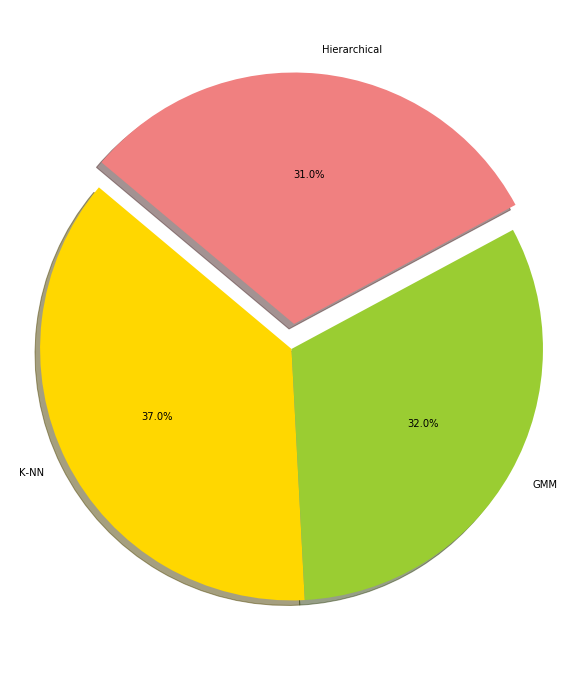

In [364]:
avg_purities = [sum(purity)/len(purity) , sum(purity3)/len(purity3) , sum(purity4)/len(purity4)]
labels = ["K-NN","GMM","Hierarchical"]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
plt.figure(figsize=(10,12))
explode = (0, 0, 0.1)
plt.pie(avg_purities , explode = explode, labels=labels, colors=colors ,
autopct='%1.1f%%', shadow=True, startangle=140 )

plt.axis('equal')
plt.show()

## Testing with keras model 

In [88]:
model = Sequential()
model.add(Dense(14,input_dim=29,activation="sigmoid"))
model.add(Dense(29,input_dim=29,activation="sigmoid"))
model.compile(optimizer='sgd',loss='mean_squared_error', metrics=['accuracy'])

In [89]:
model.fit(data_np_version,data_np_version,epochs=100)

Epoch 1/100
24998/24998 [==============================] - 1s 26us/step - loss: 1.2187 - acc: 1.2001e-04
Epoch 2/100
24998/24998 [==============================] - 1s 22us/step - loss: 1.1528 - acc: 2.4002e-04
Epoch 3/100
24998/24998 [==============================] - 1s 21us/step - loss: 1.1029 - acc: 0.0013
Epoch 4/100
24998/24998 [==============================] - 1s 21us/step - loss: 1.0656 - acc: 0.0044
Epoch 5/100
24998/24998 [==============================] - 1s 21us/step - loss: 1.0373 - acc: 0.0351
Epoch 6/100
24998/24998 [==============================] - 1s 21us/step - loss: 1.0153 - acc: 0.0558
Epoch 7/100
24998/24998 [==============================] - 1s 21us/step - loss: 0.9976 - acc: 0.0595
Epoch 8/100
24998/24998 [==============================] - 1s 21us/step - loss: 0.9828 - acc: 0.0624
Epoch 9/100
24998/24998 [==============================] - 1s 21us/step - loss: 0.9700 - acc: 0.0641
Epoch 10/100
24998/24998 [==============================] - 1s 21us/step - loss: 0.

KeyboardInterrupt: 

In [79]:
predictions = model.predict(data_np_version[:,:])

In [80]:
l = np.square(predictions[:,:] - data_np_version[:,:])

In [81]:
b = np.sum(l,axis=1)

In [82]:
c = np.sum(b,axis = 0)

In [84]:
c/(24998*29)

0.65011540672655633994

In [85]:
d = np.mean(np.square(predictions - data_np_version),axis=-1)

In [86]:
np.mean(d)

0.6501154067265563399

In [23]:

data_np_version[:1,:]

array([[-0.11453594, -0.42592784, -0.01001242, -0.0345061 , -0.09095369,
        -0.02632138, -0.02193782, -0.02180098, -0.02791524, -0.04408631,
        -0.60521684,  0.12721552, -0.63779946, -0.63165788, -0.37313313,
        -0.37394367,  0.77000884, -0.34904443, -0.06425915, -1.6901791 ,
         1.2628463 ,  1.06755048, -0.44107453, -0.25342043,  0.07102852,
        -0.63948672, -0.53532098, -0.38606912, -0.37497461]],
      dtype=float128)